In [64]:
import numpy as np
import freud

import matplotlib.pyplot as plt
from matplotlib import patches

In [220]:
box = freud.box.Box.from_box([1, 1, 0, 0.0, 0, 0])

In [221]:
d = box.xy*.5
corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]

In [222]:
points = [0.001, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 0.999]
points = np.array([[x, x, 0] for x in points])
points[:, :2] -= 0.5

In [223]:
def normal_com(x):
    return np.mean(x[:], axis=0)

(-0.7, 0.7)

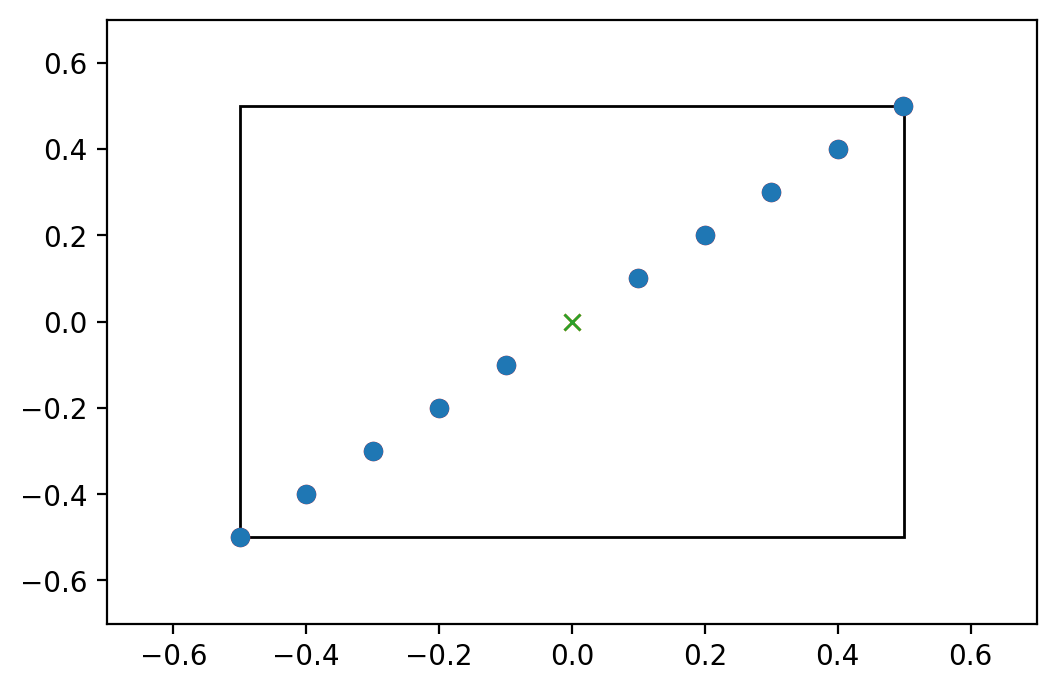

In [224]:
plt.figure(dpi=200)
wrap = box.wrap(points)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(points)
plt.plot(norm_com[0], norm_com[1], 'x')
wrap_com = normal_com(wrap)
plt.plot(wrap_com[0], wrap_com[1], 'x')
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.7, 0.7)
plt.ylim(-0.7, 0.7)

(-0.1, 1.1)

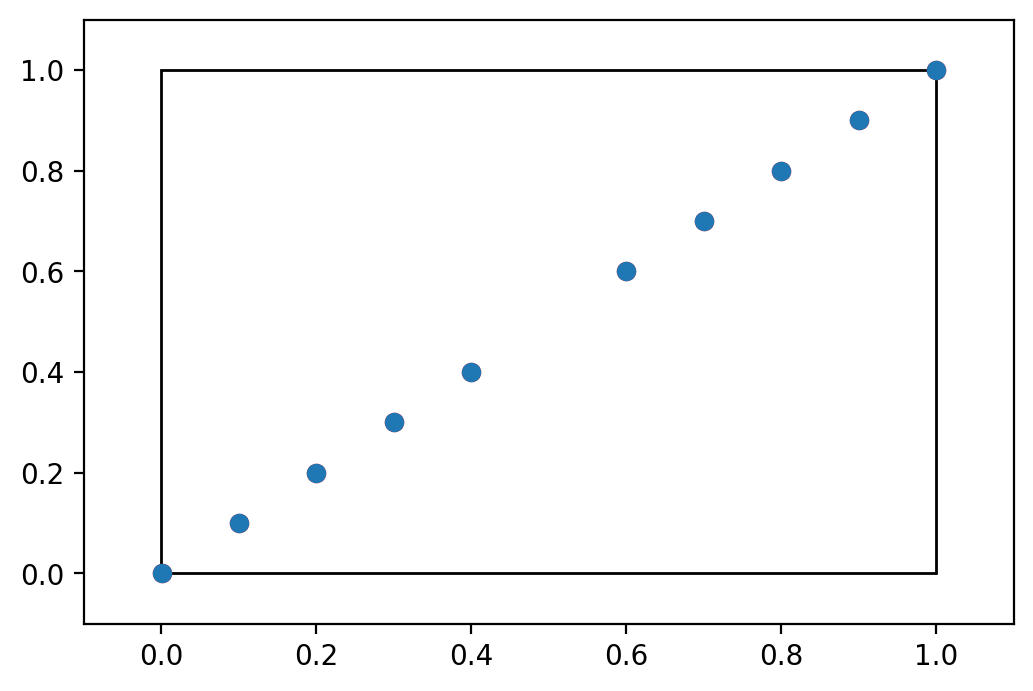

In [225]:
plt.figure(dpi=200)
frac = box.make_fractional(wrap)
plt.plot(frac[:, 0], frac[:, 1], 'o', color="red")

frac = box.make_fractional(points)
plt.plot(frac[:, 0], frac[:, 1], 'o')

box_corners = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

In [226]:
def le_com(x, nbox):
    box = freud.box.Box.from_box([nbox.Lx, nbox.Ly, 0, 0, 0, 0])
    wrap = box.wrap(nbox.wrap(x))
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)
    meany = box.make_absolute(xcom)
    meany[0] = 0.0
    meany[2] = 0.0
    print(meany)

    nx = x - meany
    wrap = box.wrap(nbox.wrap(nx))
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)
    meanx = box.make_absolute(xcom)[0]
    print(meanx)

    return np.array([meanx, meany[1], 0])

[ 0.         -0.49999997  0.        ]
-0.49999997
[-0.49999997 -0.49999997  0.        ]


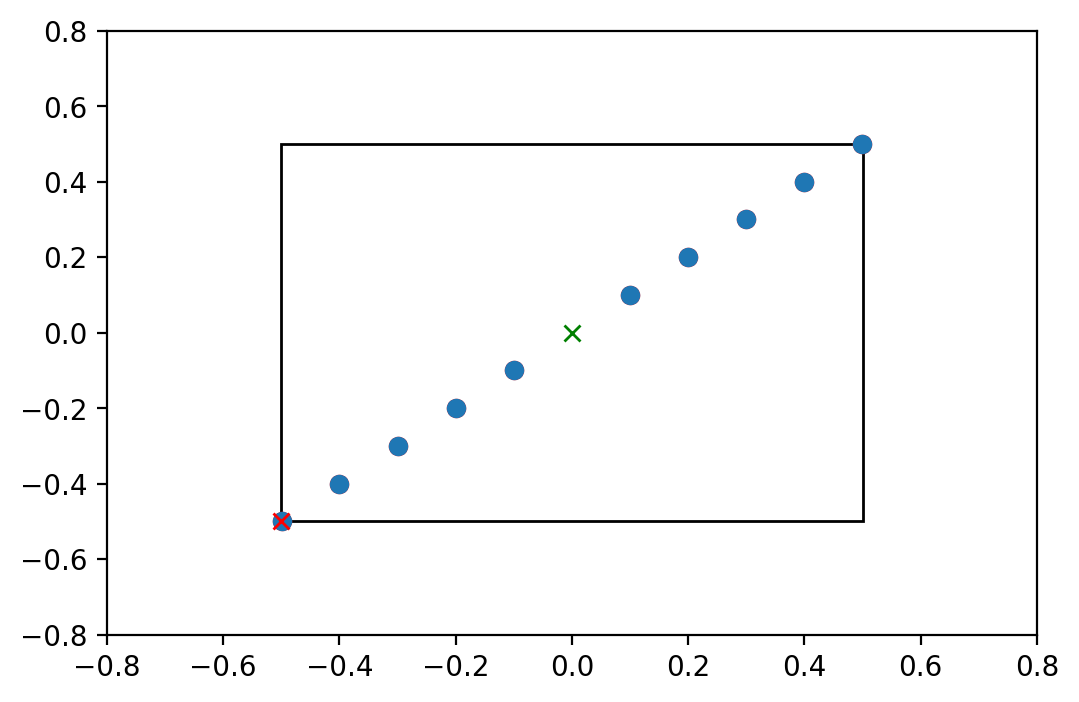

In [228]:
plt.figure(dpi=200)
wrap = box.wrap(points)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(points)
plt.plot(norm_com[0], norm_com[1], 'x', color="green")
wrap_com = le_com(wrap, box)
print(wrap_com)
plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.8 + norm_com[0], 0.8 + norm_com[0])
plt.ylim(-0.8 + norm_com[1], 0.8 + norm_com[1]);

[-3.576279e-08 -3.576279e-08  0.000000e+00]
b
[ 0.000000e+00 -8.940697e-08  0.000000e+00]
-8.940697e-08
e
[-0.49999997 -0.49999997  0.        ]
[-8.94069672e-08 -8.94069672e-08  0.00000000e+00]


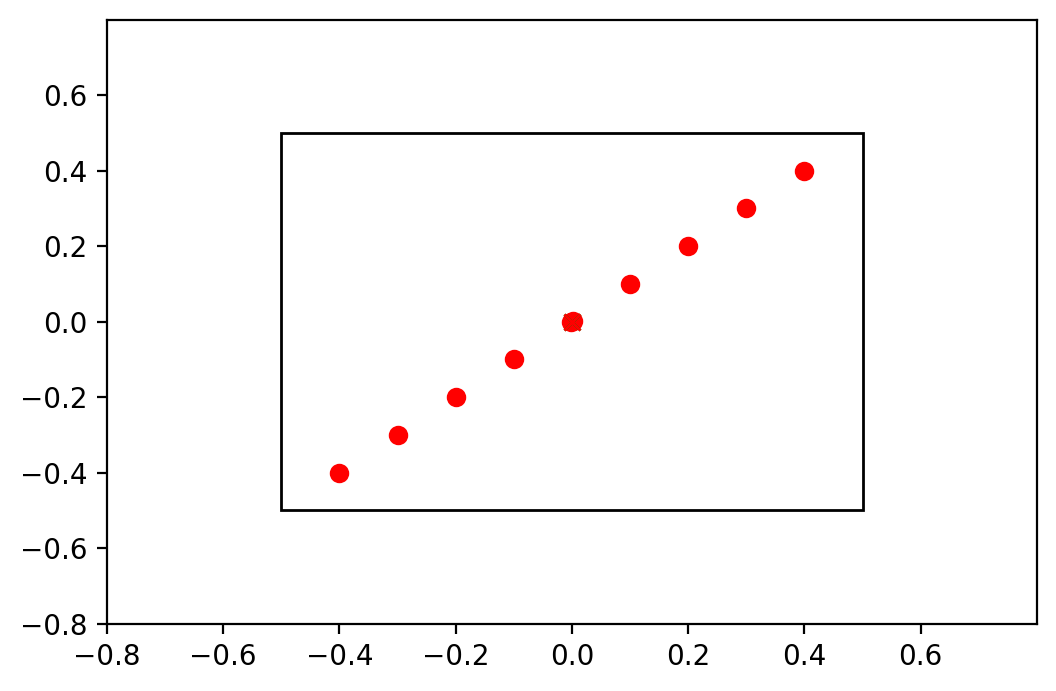

In [229]:
plt.figure(dpi=200)
wrap = box.wrap(points - wrap_com)
plt.plot(wrap[:, 0], wrap[:, 1], 'o', color="red")
# plt.plot(points[:, 0], points[:, 1], 'o')
norm_com = normal_com(wrap)
print(norm_com)
plt.plot(norm_com[0], norm_com[1], 'x', color="green")
print("b")
wrap_com2 = le_com(wrap, box)
print("e")
print(wrap_com)
print(wrap_com2)
plt.plot(wrap_com2[0], wrap_com2[1], 'x', color="red")
box_corners = np.array(corners)
quad = patches.Polygon(box_corners, closed=True, fill=False)
plt.gca().add_patch(quad)

plt.xlim(-0.8 + norm_com[0], 0.8 + norm_com[0])
plt.ylim(-0.8 + norm_com[1], 0.8 + norm_com[1]);

[ 0.         -0.49999997  0.        ]
-0.49999997
[ 0.         -0.49999997  0.        ]
0.47368395
[ 0.         -0.49999997  0.        ]
-0.05263096
[ 0.         -0.49999997  0.        ]
-0.078947306
[ 0.         -0.49999997  0.        ]
-0.105263054
[ 0.         -0.49999997  0.        ]
-0.13157892
[ 0.         -0.49999997  0.        ]
-0.1578947
[ 0.         -0.49999997  0.        ]
-0.18421054
[ 0.         -0.49999997  0.        ]
-0.21052632
[ 0.         -0.49999997  0.        ]
-0.23684213
[ 0.         -0.49999997  0.        ]
-0.26315784
[ 0.         -0.49999997  0.        ]
-0.28947365
[ 0.         -0.49999997  0.        ]
-0.31578946
[ 0.         -0.49999997  0.        ]
-0.34210533
[ 0.         -0.49999997  0.        ]
-0.36842102
[ 0.         -0.49999997  0.        ]
-0.3947369
[ 0.         -0.49999997  0.        ]
-0.42105266
[ 0.         -0.49999997  0.        ]
-0.4473684
[ 0.         -0.49999997  0.        ]
-0.4736842
[ 0.         -0.49999997  0.        ]
-0.49999997


(-2.0, 2.0)

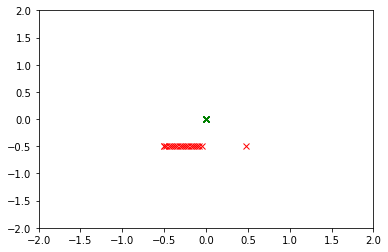

In [234]:
for xy in np.linspace(0, 1, 20):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

dx = 2
plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
plt.ylim(norm_com[1] - dx, norm_com[1] + dx)

In [48]:
def le_com_fixed(x, box):
    wrap = box.wrap(x)
    frac = box.make_fractional(wrap)
    theta = frac * 2 * np.pi

    ce = np.cos(theta)
    xi = np.sin(theta)

    mce = np.mean(ce, axis=0)
    mxi = np.mean(xi, axis=0)

    mtheta = np.arctan2(-mxi, -mce) + np.pi

    xcom = mtheta / (2 * np.pi)

    return box.make_absolute(xcom)    

In [49]:
points = np.array([[0, -0.05, 0], [0.1, 0.1, 0], [0.15, 0.15, 0], [0.2, 0.2, 0], [0.25, 0.25, 0], [0.3, 0.3, 0], [0.1, 0.3, 0], [0.0, 0.3, 0], [0.08, 0.3, 0], [-0.0, 0.3, 0]])*.5
points[:, :2] -= 0.5

(-0.8, 0.8)

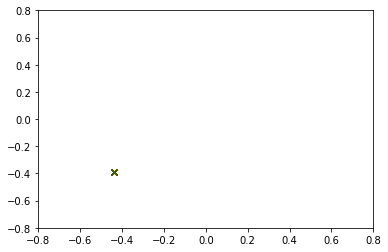

In [50]:
for xy in np.linspace(0, 1, 10):
    box = freud.box.Box.from_box([1, 1, 0, xy, 0, 0])
    d = box.xy*.5
    corners = [-.5 - d, -.5], [-.5 + d, .5], [.5 + d, .5], [.5 - d, -.5]
    wrap = box.wrap(points)
    norm_com = normal_com(points)
    wrap_com = le_com_fixed(wrap, box)
    plt.plot(wrap_com[0], wrap_com[1], 'x', color="red")
    plt.plot(norm_com[0], norm_com[1], 'x', color="green")

# dx = 0.001
# plt.xlim(norm_com[0] - dx, norm_com[0] + dx)
# plt.ylim(norm_com[1] - dx, norm_com[1] + dx);
plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)